In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [3]:
A.rank()

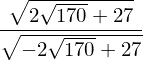

In [4]:
A.condition_number()

In [5]:
sympy.N(_)

In [6]:
A.norm()

In [7]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
np.linalg.matrix_rank(A)

2

In [8]:
np.linalg.cond(A)

In [9]:
np.linalg.norm(A)

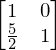

In [10]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
L, U, _ = A.LUdecomposition()
L

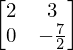

In [11]:
U

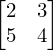

In [12]:
L * U

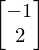

In [13]:
x = A.solve(b); x  # equivalent to A.LUsolve(b)

In [14]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P, L, U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [15]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [16]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [17]:
la.solve(A, b)

array([-1.,  2.])

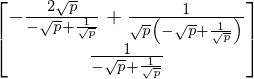

In [18]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x = A.solve(b)
x

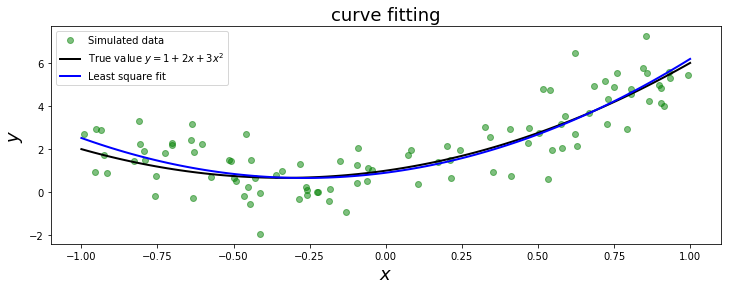

In [24]:
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2
#simulate noisy data
m= 100
X= 1 - 2 * np.random.rand(m)
Y= a + b * X + c * X**2 + np.random.randn(m)
# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_title('curve fitting',fontsize=18)
ax.legend(loc=2)